Thực Hành 2


In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


1.1 Biến đổi cường độ ảnh
phép biến đổi cường độ ảnh từ tối sang sáng và ngược lại

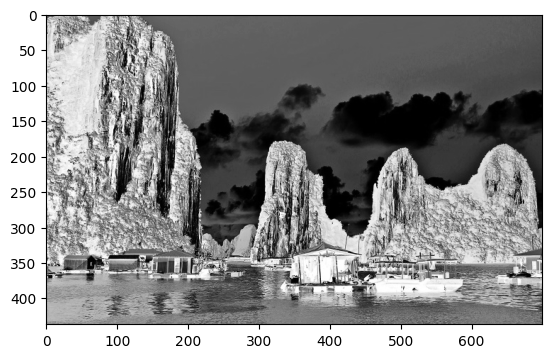

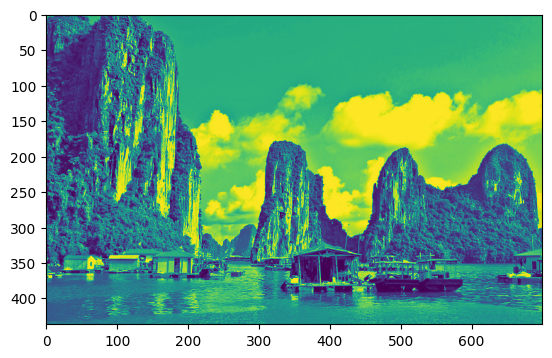

In [6]:
img = Image.open('exercise/ha-long-bay-in-vietnam.jpg').convert('L')

im_1 = np.asarray(img)

im_2 = 255 - im_1

new_img = Image.fromarray(im_2)

img.show()
plt.imshow(new_img, cmap='gray')
plt.show()
plt.imshow(img)
plt.show()

1.2 Thay đổi chất lượng ảnh với Power law(Gamma-Correction)
dùng để tăng chất lượng ảnh

/var/folders/sg/mpmvl8v16nj31qcx1w7wgs_m0000gn/T/ipykernel_3171/3527902258.py:8: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


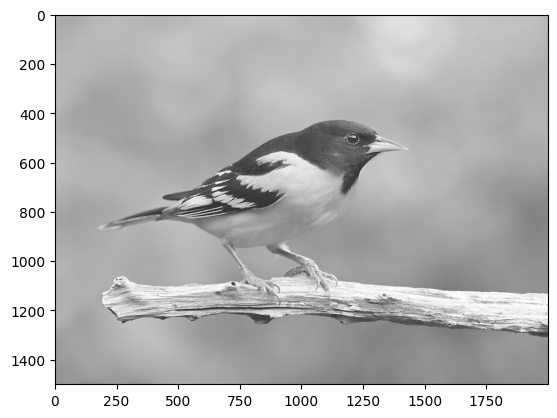

In [37]:
img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)
gamma = 0.5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b1/b2
b2 = np.log(b3) * gamma
c = np.exp(b2) * 255.0
c1 = c.astype(np.int8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

/var/folders/sg/mpmvl8v16nj31qcx1w7wgs_m0000gn/T/ipykernel_3171/1621074438.py:18: RuntimeWarning: invalid value encountered in power
  log_gamma = np.power(log_img, gamma)
/var/folders/sg/mpmvl8v16nj31qcx1w7wgs_m0000gn/T/ipykernel_3171/1621074438.py:24: RuntimeWarning: invalid value encountered in cast
  c = np.clip(c, 0, 255).astype(np.uint8)


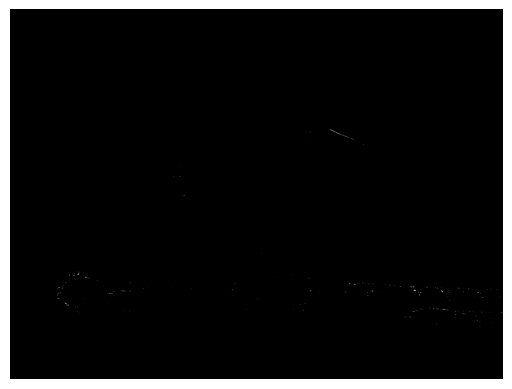

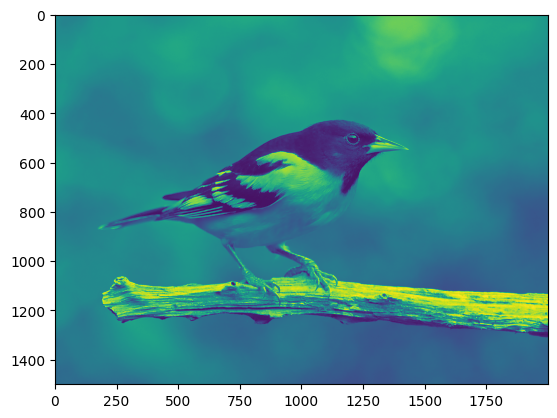

In [59]:

# Đọc ảnh và chuyển sang grayscale
img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img).astype(float)

gamma = 0.5 # theo yêu cầu đề bài, xem sự thay đổi giữa 5 vs 0.5
#gamma = 0.5

# Chuẩn hóa về [0,1], tránh chia cho 0
b2 = np.max(im_1)
b3 = im_1 / b2

# Thêm epsilon tránh log(0)
epsilon = 1e-10
log_img = np.log(b3 + epsilon)

# Áp dụng gamma trên log
log_gamma = np.power(log_img, gamma)

# Lấy exp trở lại và chuẩn hóa về 0-255
c = np.exp(log_gamma) * 255.0

# Giới hạn giá trị trong 0-255 và chuyển về uint8
c = np.clip(c, 0, 255).astype(np.uint8)

# Tạo ảnh PIL từ mảng numpy
d = Image.fromarray(c)

# Hiển thị ảnh gốc và ảnh biến đổi
img.show()
d.show()

# Hiển thị bằng matplotlib
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(im_1)
plt.show()

1.3 Thay đổi cường đọ điểm ảnh với Log Transformation

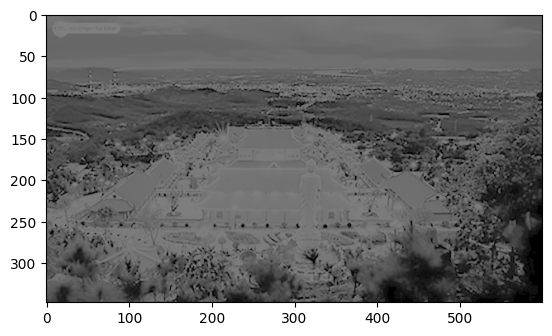

In [32]:
img = Image.open('exercise/pagoda.jpg').convert('L')

im_1 = np.asarray(img)

b1 = im_1.astype(float)

b2 = np.max(b1)

c = (128.0 * np.log(1+b1)) / np.log(1+b2)
c1 = c.astype(np.int8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

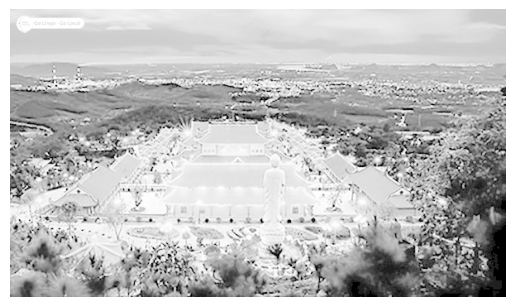

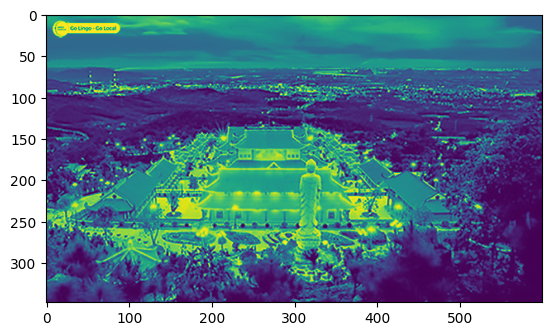

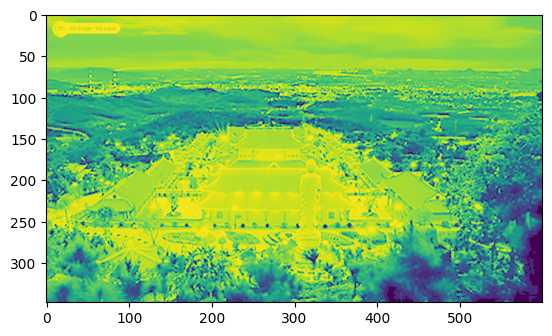

In [33]:

# Đọc ảnh và chuyển sang grayscale
img = Image.open('exercise/pagoda.jpg').convert('L')

im_1 = np.asarray(img).astype(float)

b2 = np.max(im_1)

# Biến đổi log chuẩn hóa về khoảng 0-128
c = (128.0 * np.log(1 + im_1)) / np.log(1 + b2)

# Chuyển về kiểu uint8 và giới hạn trong [0,255]
c1 = np.clip(c, 0, 255).astype(np.uint8)

# Tạo ảnh PIL từ mảng numpy
d = Image.fromarray(c1)

# Hiển thị ảnh gốc và ảnh biến đổi

img.show()
d.show()

# Hiển thị ảnh biến đổi bằng matplotlib
plt.imshow(c1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(d)
plt.show()

1.4 Histogram equalization
histogram(lược đồ xám) là biểu đồ tần xuất thống kê số lần xuất hiện các mức sáng trong ảnh. Mục đích là cải tiến độ tương phản hai cùng sáng tối của ảnh

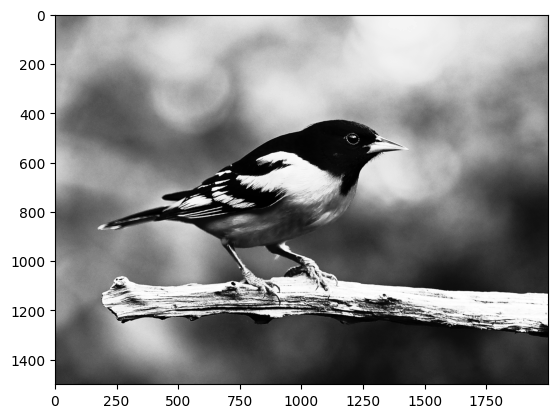

In [42]:
img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.flatten()
hist, bins = np.histogram(im_1, 256, [0,255])

cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf, 0)

num_cdf_m = (cdf_m -cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m

cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')

im_2 = cdf_m[b1]
#im_2 = cdf[b1]
im_3 = np.reshape(im_2, im_1.shape)

im_4 = Image.fromarray(im_3)

img.show()
im_4.show()
plt.imshow(im_4, cmap='gray')
plt.show()

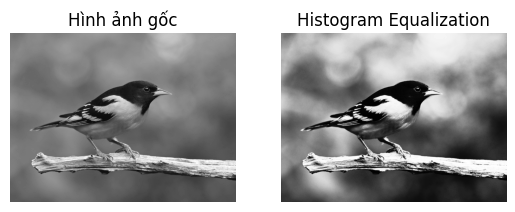

In [21]:

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.flatten()
hist, bins = np.histogram(im_1, 256, [0, 256])  # chú ý: [0,256]

cdf = hist.cumsum()

# Loại bỏ các giá trị zero trong cdf
cdf_m = np.ma.masked_equal(cdf, 0)

num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())  # dùng cdf_m.max() thay vì cdf.max()

cdf_m = num_cdf_m / den_cdf_m

cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')

# Thay đổi giá trị pixel bằng cdf đã chuẩn hóa
im_2 = cdf_m[b1]

# Đưa về kích thước ảnh gốc
im_3 = np.reshape(im_2, im_1.shape)

im_4 = Image.fromarray(im_3)

# Hiển thị ảnh gốc và ảnh cân bằng histogram
img.show()
im_4.show()

plt.subplot(1, 2, 1)
plt.title('Hình ảnh gốc')
plt.imshow(im_1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram Equalization')
plt.imshow(im_3, cmap='gray')
plt.axis('off')

plt.show()

1.5 thay đổi ảnh với contrast stretching
tương tự như histogram equalization nhưng thay đổi giá trị pixel thay vì dùng xác xuất, CDF để tính như Histogram

0 255


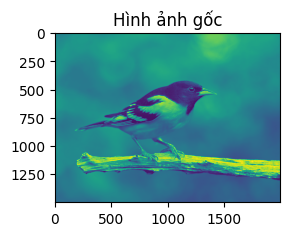

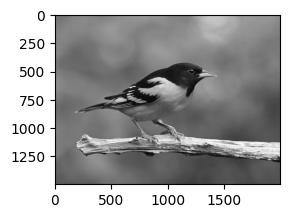

In [25]:
img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
b = im_1.max()
a = im_1.min()
print(a,b)

c = im_1.astype(float)
im_2 = 255*(c - a)/(b-a)
im_3 = Image.fromarray(im_2)

img.show()
im_3.show()

plt.subplot(1, 2, 1)
plt.title('Hình ảnh gốc')
plt.imshow(img)
plt.show()
plt.subplot(1, 2, 2)
plt.imshow(im_3)
plt.show()

1.6 biến đổi Fourier
dùng để biến đổi ảnh theo miền tần suất. Biến đổi Fourier được sử dụng trong image filter, image compression, image enhancement, image restoration, image analysis, image reconstruction

In [ ]:
# 1.6.1 Biến đổi ảnh với Fast Fourier


In [ ]:
#1.6.2 Lọc ảnh trong miền tần suất

    Bài tập

Bài Tập 1: mã tạo menu cho phép người dùng chọn các phương án biến đổi ảnh như sau
Image inverse transformation
Gamma correction
Log transformation
Histogram equalization
Contrast stretching


Chọn phép biến đổi:
I. Image Inverse Transformation


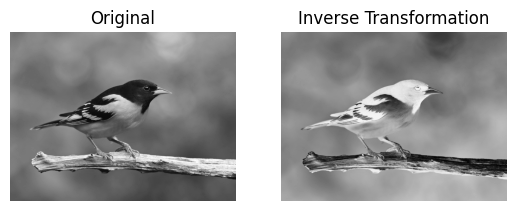

In [58]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def inverse_transform(img_arr):
    return 255 - img_arr


def gamma_correction(img_arr, gamma=2.2):
    norm = img_arr / 255.0
    corrected = np.power(norm, gamma)
    return np.clip(corrected * 255, 0, 255).astype(np.uint8)


def log_transform(img_arr):
    c = 255 / np.log(1 + np.max(img_arr))
    return np.clip(c * np.log(1 + img_arr), 0, 255).astype(np.uint8)


def histogram_equalization(img_arr):
    hist, _ = np.histogram(img_arr.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    return cdf_final[img_arr]


def contrast_stretching(img_arr):
    a, b = np.min(img_arr), np.max(img_arr)
    stretched = (img_arr - a) * 255 / (b - a)
    return np.clip(stretched, 0, 255).astype(np.uint8)


def show_result(original, processed, title):
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(processed, cmap='gray')
    plt.axis('off')

    plt.show()


def main():
    path = input("Nhập đường dẫn ảnh: ").strip()
    img = Image.open(path).convert('L')
    img_arr = np.array(img)

    print("\nChọn phép biến đổi:")
#    print("I. Image Inverse Transformation")
 #   print("G. Gamma Correction")
  #  print("L. Log Transformation")
   # print("H. Histogram Equalization")
    #print("C. Contrast Stretching")

    choice = input("Lựa chọn (I_G_L_H_C): ").strip()

    if choice == 'I':
        print("I. Image Inverse Transformation")
        result = inverse_transform(img_arr)
        show_result(img_arr, result, "Inverse Transformation")
    elif choice == 'G':
        print("G. Gamma Correction")
        gamma = float(input("Nhập gamma (ví dụ 0.5 hoặc 2.2): "))
        result = gamma_correction(img_arr, gamma)
        show_result(img_arr, result, f"Gamma Correction (γ={gamma})")
    elif choice == 'L':
        print("L. Log Transformation")
        result = log_transform(img_arr)
        show_result(img_arr, result, "Log Transformation")
    elif choice == 'H':
        print("H. Histogram Equalization")
        result = histogram_equalization(img_arr)
        show_result(img_arr, result, "Histogram Equalization")
    elif choice == 'C':
        print("C. Contrast Stretching")
        result = contrast_stretching(img_arr)
        show_result(img_arr, result, "Contrast Stretching")
    else:
        print("Lựa chọn không hợp lệ.")


if __name__ == "__main__":
    main()